<a href="https://colab.research.google.com/github/TongkaiYang/Vision-Zero-Madison/blob/turrkey/CS_638_weekly_plots_(10_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime as dt
sns.set(style="white")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
raw_df = pd.read_csv('drive/My Drive/CS 638/Madison_crash_2009_2019.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



## We want to find out if crash severity has a pattern during day hours. Also, we are interested in the effect of weekday and weekend to crash severity.

Text(0, 0.5, 'Average number of traffic accident')

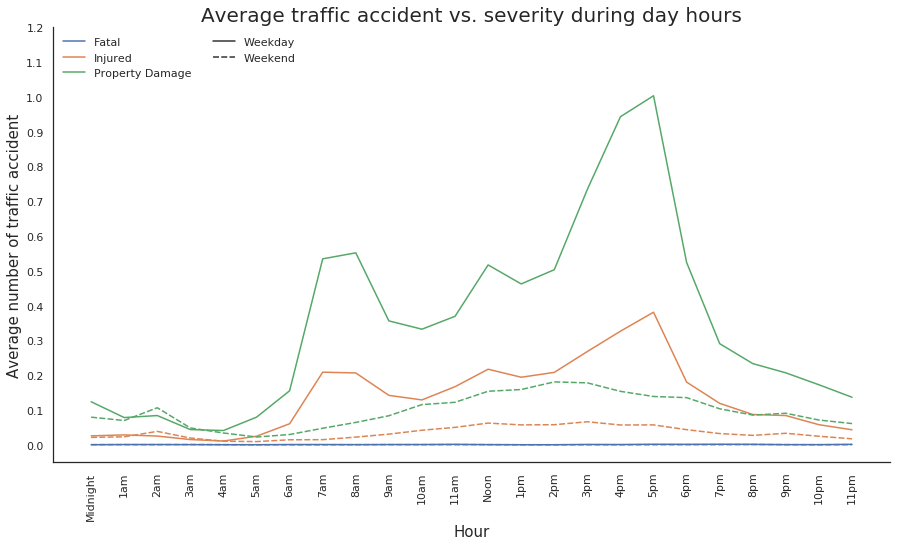

In [4]:
#Average traffic accident vs. severity during day hours
raw_df['ACCDDATE'] = pd.to_datetime(raw_df['ACCDDATE'])
week = [x.weekday() + 1 for x in raw_df['ACCDDATE']]
week_flag = ['weekday' if x >= 1 and x <= 5 else 'weekend' for x in week]
raw_df['week_flag'] = week_flag
time_svr = raw_df.groupby(['NTFYHOUR', 'week_flag', 'ACCDSVR']).count()['DOCTNMBR'].reset_index()
time_svr.loc['DOCTNMBR',2] = time_svr['DOCTNMBR'][2] + time_svr['DOCTNMBR'][133]
time_svr.loc['DOCTNMBR',5] = time_svr['DOCTNMBR'][5] + time_svr['DOCTNMBR'][134]
time_svr = time_svr[:133]
time_svr['DOCTNMBR'] = time_svr['DOCTNMBR'] / (10 * 365)
plt.figure(figsize = (15,8))
time_svr_plt = sns.lineplot(x = 'NTFYHOUR', y = 'DOCTNMBR', hue = 'ACCDSVR', style = 'week_flag', data = time_svr)
time_svr_plt.set_xticks(list(range(24)))
time_svr_plt.set_xticklabels(['Midnight', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', 
                              '11am', 'Noon', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', 
                              '11pm'], rotation = 90)
time_svr_plt.yaxis.set_ticks(np.arange(0, 1.3, 0.1))
time_svr_leg = time_svr_plt.get_legend_handles_labels()[0][1:4] + time_svr_plt.get_legend_handles_labels()[0][5:]
time_svr_plt.legend(time_svr_leg, ['Fatal', 'Injured', 'Property Damage', 'Weekday', 'Weekend'], ncol = 2, title='', frameon = False, loc='upper left')
time_svr_plt.spines['right'].set_visible(False)
time_svr_plt.spines['top'].set_visible(False)
time_svr_plt.set_title('Average traffic accident vs. severity during day hours', fontsize = 20)
time_svr_plt.set_xlabel('Hour', fontsize = 15)
time_svr_plt.set_ylabel('Average number of traffic accident', fontsize = 15)

*   During regular weekdays, the average number of traffic accident tends to increase from 6am, 11am and 2pm, and then reach peack at 8am 12pm and 5am, which are all the rush hour of the day.
*   During weekends, traffic accidents tend to cluster between 11am and 6pm.

## After getting the general accident trend along day hour, we filter out the accdient due to drunk driving

Text(0, 0.5, 'Total number of traffic accident')

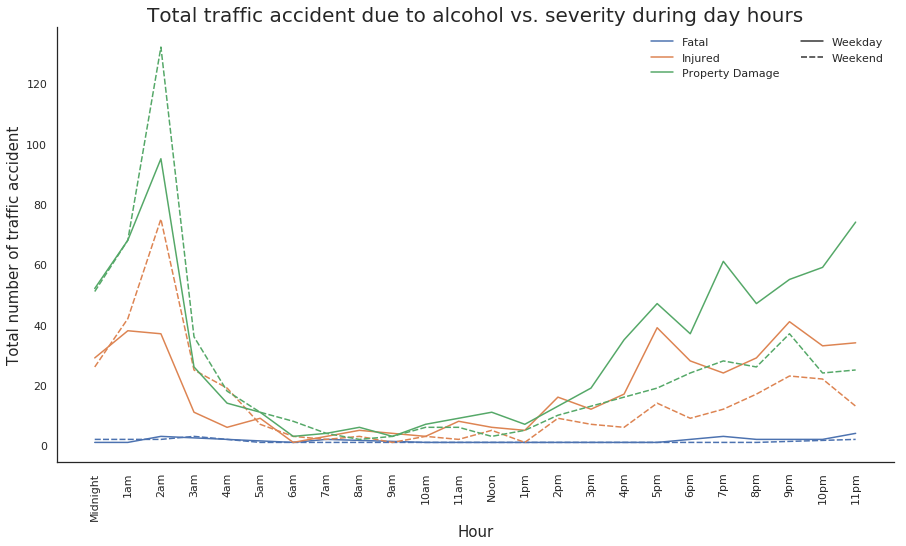

In [5]:
ALC_df = raw_df[raw_df.ALCFLAG == 'Y'].copy()
alc_time_svr = ALC_df.groupby(['NTFYHOUR', 'week_flag', 'ACCDSVR']).count()['DOCTNMBR'].reset_index()
plt.figure(figsize = (15,8))
alc_time_svr_plt = sns.lineplot(x = 'NTFYHOUR', y = 'DOCTNMBR', hue = 'ACCDSVR', style = 'week_flag', data = alc_time_svr)
alc_time_svr_plt.set_xticks(list(range(24)))
alc_time_svr_plt.set_xticklabels(['Midnight', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', 
                              '11am', 'Noon', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', 
                              '11pm'], rotation = 90)
#alc_time_svr_plt.yaxis.set_ticks(np.arange(0, 1.3, 0.1))
alc_time_svr_leg = alc_time_svr_plt.get_legend_handles_labels()[0][1:4] + alc_time_svr_plt.get_legend_handles_labels()[0][5:]
alc_time_svr_plt.legend(alc_time_svr_leg, ['Fatal', 'Injured', 'Property Damage', 'Weekday', 'Weekend'], ncol = 2, title='', frameon = False, loc='upper right')
alc_time_svr_plt.spines['right'].set_visible(False)
alc_time_svr_plt.spines['top'].set_visible(False)
alc_time_svr_plt.set_title('Total traffic accident due to alcohol vs. severity during day hours', fontsize = 20)
alc_time_svr_plt.set_xlabel('Hour', fontsize = 15)
alc_time_svr_plt.set_ylabel('Total number of traffic accident', fontsize = 15)

Drunk driving accident has a different pattern comapred to the general case. 
*   The number of accident keeps low during morning hours and starts to increase at 2pm. 
*   The number of accident (injured and fatal) reaches peak at 2am for both weekday and weekend. 
*   Possible reason: People are more likely to drink in evening and night (6pm to 2pm). Especially on weekend, people come to party at late night and may drunk drive.

